In [1]:
import matplotlib
#matplotlib.use('agg') # This line is necessary for non-gui linux systems
import matplotlib.pyplot as plt
import numpy as np
import phonopy
from phonopy import Phonopy
import phonopy.interface.vasp as Intf_vasp
from phonopy.structure.atoms import PhonopyAtoms
import phonopy.file_IO as PhonIO
from phonopy.interface.calculator import get_default_physical_units
import API_phonopy as api_ph
import AllenFeldman as AF
from API_phonopy_lammps import calc_PartRatio_mesh

In [2]:
mesh = [1,1,1] # at only gamma point.
T = 300
Gamma = np.array([0,0,0])
broad_factor = 1.0
phonon = phonopy.load(supercell_matrix=[1,1,1],primitive_matrix='auto',
                     unitcell_filename="POSCAR_512_SWrelx",
                     force_constants_filename='FORCE_CONSTANTS') # load the force constants.

In [3]:
phonon.run_mesh(mesh, is_gamma_center=True, 
            with_eigenvectors=True,with_group_velocities=True,
            is_mesh_symmetry=True) # get full mesh set to false
qpoints, weights, frequencies, eigvecs = phonon.get_mesh()
eigvecs = eigvecs[0] # at Gamma Point
freqs = frequencies[0]
Broadening = broad_factor*np.mean(np.diff(freqs))

Cmodes = api_ph.mode_cv(T,freqs)

Vol = phonon.get_supercell().get_volume()*1e-30
   

Text(0, 0.5, 'Diffusivity ($m^2$/s)')

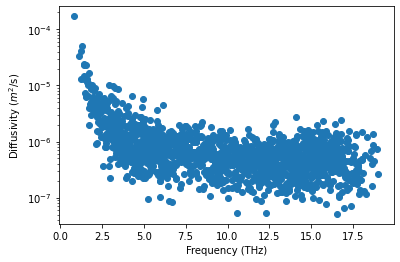

In [4]:
vx_modepairs,vy_modepairs,vz_modepairs = AF.get_velmat_modepairs_q(phonon,Gamma)
Diffusivities = AF.calc_Diff(freqs,vx_modepairs,vy_modepairs,vz_modepairs,LineWidth=Broadening)
plt.semilogy(freqs[3:],Diffusivities[3:],'o')
plt.xlabel('Frequency (THz)')
plt.ylabel('Diffusivity ($m^2$/s)')

Text(0, 0.5, 'Participation Ratio')

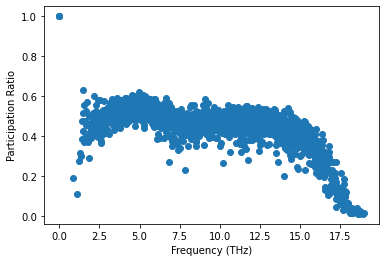

In [5]:
freqs,PartRatio = calc_PartRatio_mesh(phonon)
plt.plot(freqs[0],PartRatio[0],'o')
plt.xlabel('Frequency (THz)')
plt.ylabel('Participation Ratio')

In [6]:
k = np.sum(Cmodes[3:]*Diffusivities[3:]/Vol)
print('k = '+str(k)+' W/mK')

k = 2.265025031485129 W/mK
